In [2]:
import rasterio
import rasterio.mask
from rasterio import plot
import matplotlib.pyplot as plt

import fiona
import shapely
#from rasterio.windows import Window, WindowMethodsMixin

In [2]:
print(rasterio.__version__)
print(shapely.__version__)
print(fiona.__version__)

1.0a12
1.6.4.post1
1.7.11


In [48]:
from rasterstats import zonal_stats
stats = zonal_stats(
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    data_path,
    nodata=-999,
    categorical=True,
    stats=['count',  'unique']
)
stats

/opt/conda/lib/python3.6/site-packages/rasterstats/main.py:161: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(fsrc.array.dtype, float) and \


[{11: 1159,
  21: 17328,
  22: 7788,
  23: 4720,
  24: 1258,
  31: 15,
  41: 16395,
  42: 938,
  43: 2303,
  52: 814,
  71: 1111,
  81: 1802,
  82: 3118,
  90: 7647,
  95: 104,
  'count': 66500,
  'unique': 15}]

In [49]:
display(dataset)

<open DatasetReader name='/data/188-million-us-wildfires/src/usgrid_data_2010/uspop10.tif' mode='r'>

In [50]:
out_image, out_transform = rasterio.mask.mask(
    dataset,
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    crop=True
)
out_meta = dataset.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("/data/188-million-us-wildfires/masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

ValueError: Input shapes do not overlap raster.

---

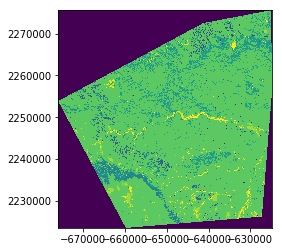

In [51]:
data_path = r"/data/188-million-us-wildfires/masked.tif"
masked_dataset = rasterio.open(data_path)
plot.show(masked_dataset)

/opt/conda/lib/python3.6/site-packages/matplotlib/image.py:423: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


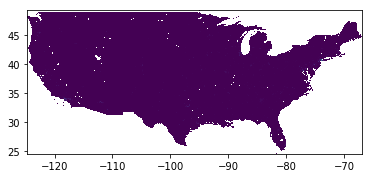

In [8]:
census_population_path = "/data/188-million-us-wildfires/src/usgrid_data_2010/uspop10.tif"
census_population = rasterio.open(census_population_path)
plot.show(census_population, cmap='viridis')

In [52]:
from functools import partial
import pyproj
import geopandas as gpd
from shapely.ops import transform

data_path = "/data/188-million-us-wildfires/src/nlcd_2011_landcover_2011_edition_2014_10_10/nlcd_2011_landcover_2011_edition_2014_10_10.img"
zone_path = "/data/188-million-us-wildfires/princeton.geojson"
gdf = gpd.read_file(zone_path)

project = partial(
    pyproj.transform,
    pyproj.Proj(init='EPSG:4326'),
    pyproj.Proj('+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'))

def reproject(row):
    return transform(project, row["geometry"])

gdf["geometry"] = gdf.apply(reproject, axis=1)

display(gdf)

,geometry
0,"POLYGON ((1780194.465244725 2122185.325739045,..."


In [61]:
from functools import partial
import pyproj
import geopandas as gpd
from shapely.ops import transform
from rasterstats import zonal_stats

In [1]:
data_path = "/data/188-million-us-wildfires/src/usgrid_data_2010/uspop10.tif"
zone_path = "/data/188-million-us-wildfires/santarosa.geojson"

dataset = rasterio.open(data_path)
gdf = gpd.read_file(zone_path)

out_image, out_transform = rasterio.mask.mask(
    dataset,
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    crop=True,
    nodata=99
)

out_meta = dataset.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

display(plot.show(out_image))

plot.show_hist(
    out_image,
    bins=50,
    stacked=False,
    alpha=0.3,
    histtype='stepfilled',
    title="Histogram"
)

stats = zonal_stats(
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    data_path,
    nodata=-999,
    stats=["count", "max", "mean", "min", "median"]
)
stats

NameError: name 'rasterio' is not defined

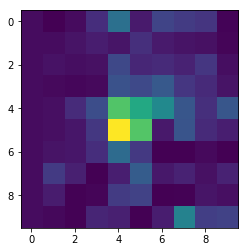

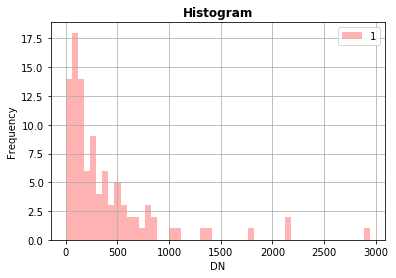

/opt/conda/lib/python3.6/site-packages/rasterstats/main.py:161: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(fsrc.array.dtype, float) and \


397.2324609375

In [66]:
data_path = "/data/188-million-us-wildfires/src/usgrid_data_2010/uspop10.tif"
zone_path = "/data/188-million-us-wildfires/princeton.geojson"

dataset = rasterio.open(data_path)
gdf = gpd.read_file(zone_path)

out_image, out_transform = rasterio.mask.mask(
    dataset,
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    crop=True,
    nodata=99
)

out_meta = dataset.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

display(plot.show(out_image))

plot.show_hist(
    out_image,
    bins=50,
    stacked=False,
    alpha=0.3,
    histtype='stepfilled',
    title="Histogram"
)

stats = zonal_stats(
    [shapely.geometry.mapping(gdf.loc[0]['geometry'])],
    data_path,
    nodata=-999,
    #stats=["count", "max", "mean", "min", "median"]
    stats=["mean"]
)
stats[0]["mean"]